In [4]:
import warnings 
warnings.filterwarnings('ignore') 
# Importando as bibliotecas necessárias da diagrams
from diagrams import Diagram, Cluster, Edge
from diagrams.gcp.analytics import Bigquery, Dataflow, Composer, DataFusion
from diagrams.gcp.compute import Functions
from diagrams.gcp.ml import AIPlatform, Automl
from diagrams.gcp.storage import Storage
from diagrams.gcp.database import SQL as gcp_sql
from diagrams.custom import Custom 
from diagrams.generic.blank import Blank  
from diagrams.generic.database import SQL
from diagrams.generic.storage import Storage

# https://googlecloudcheatsheet.withgoogle.com/


#  Overview

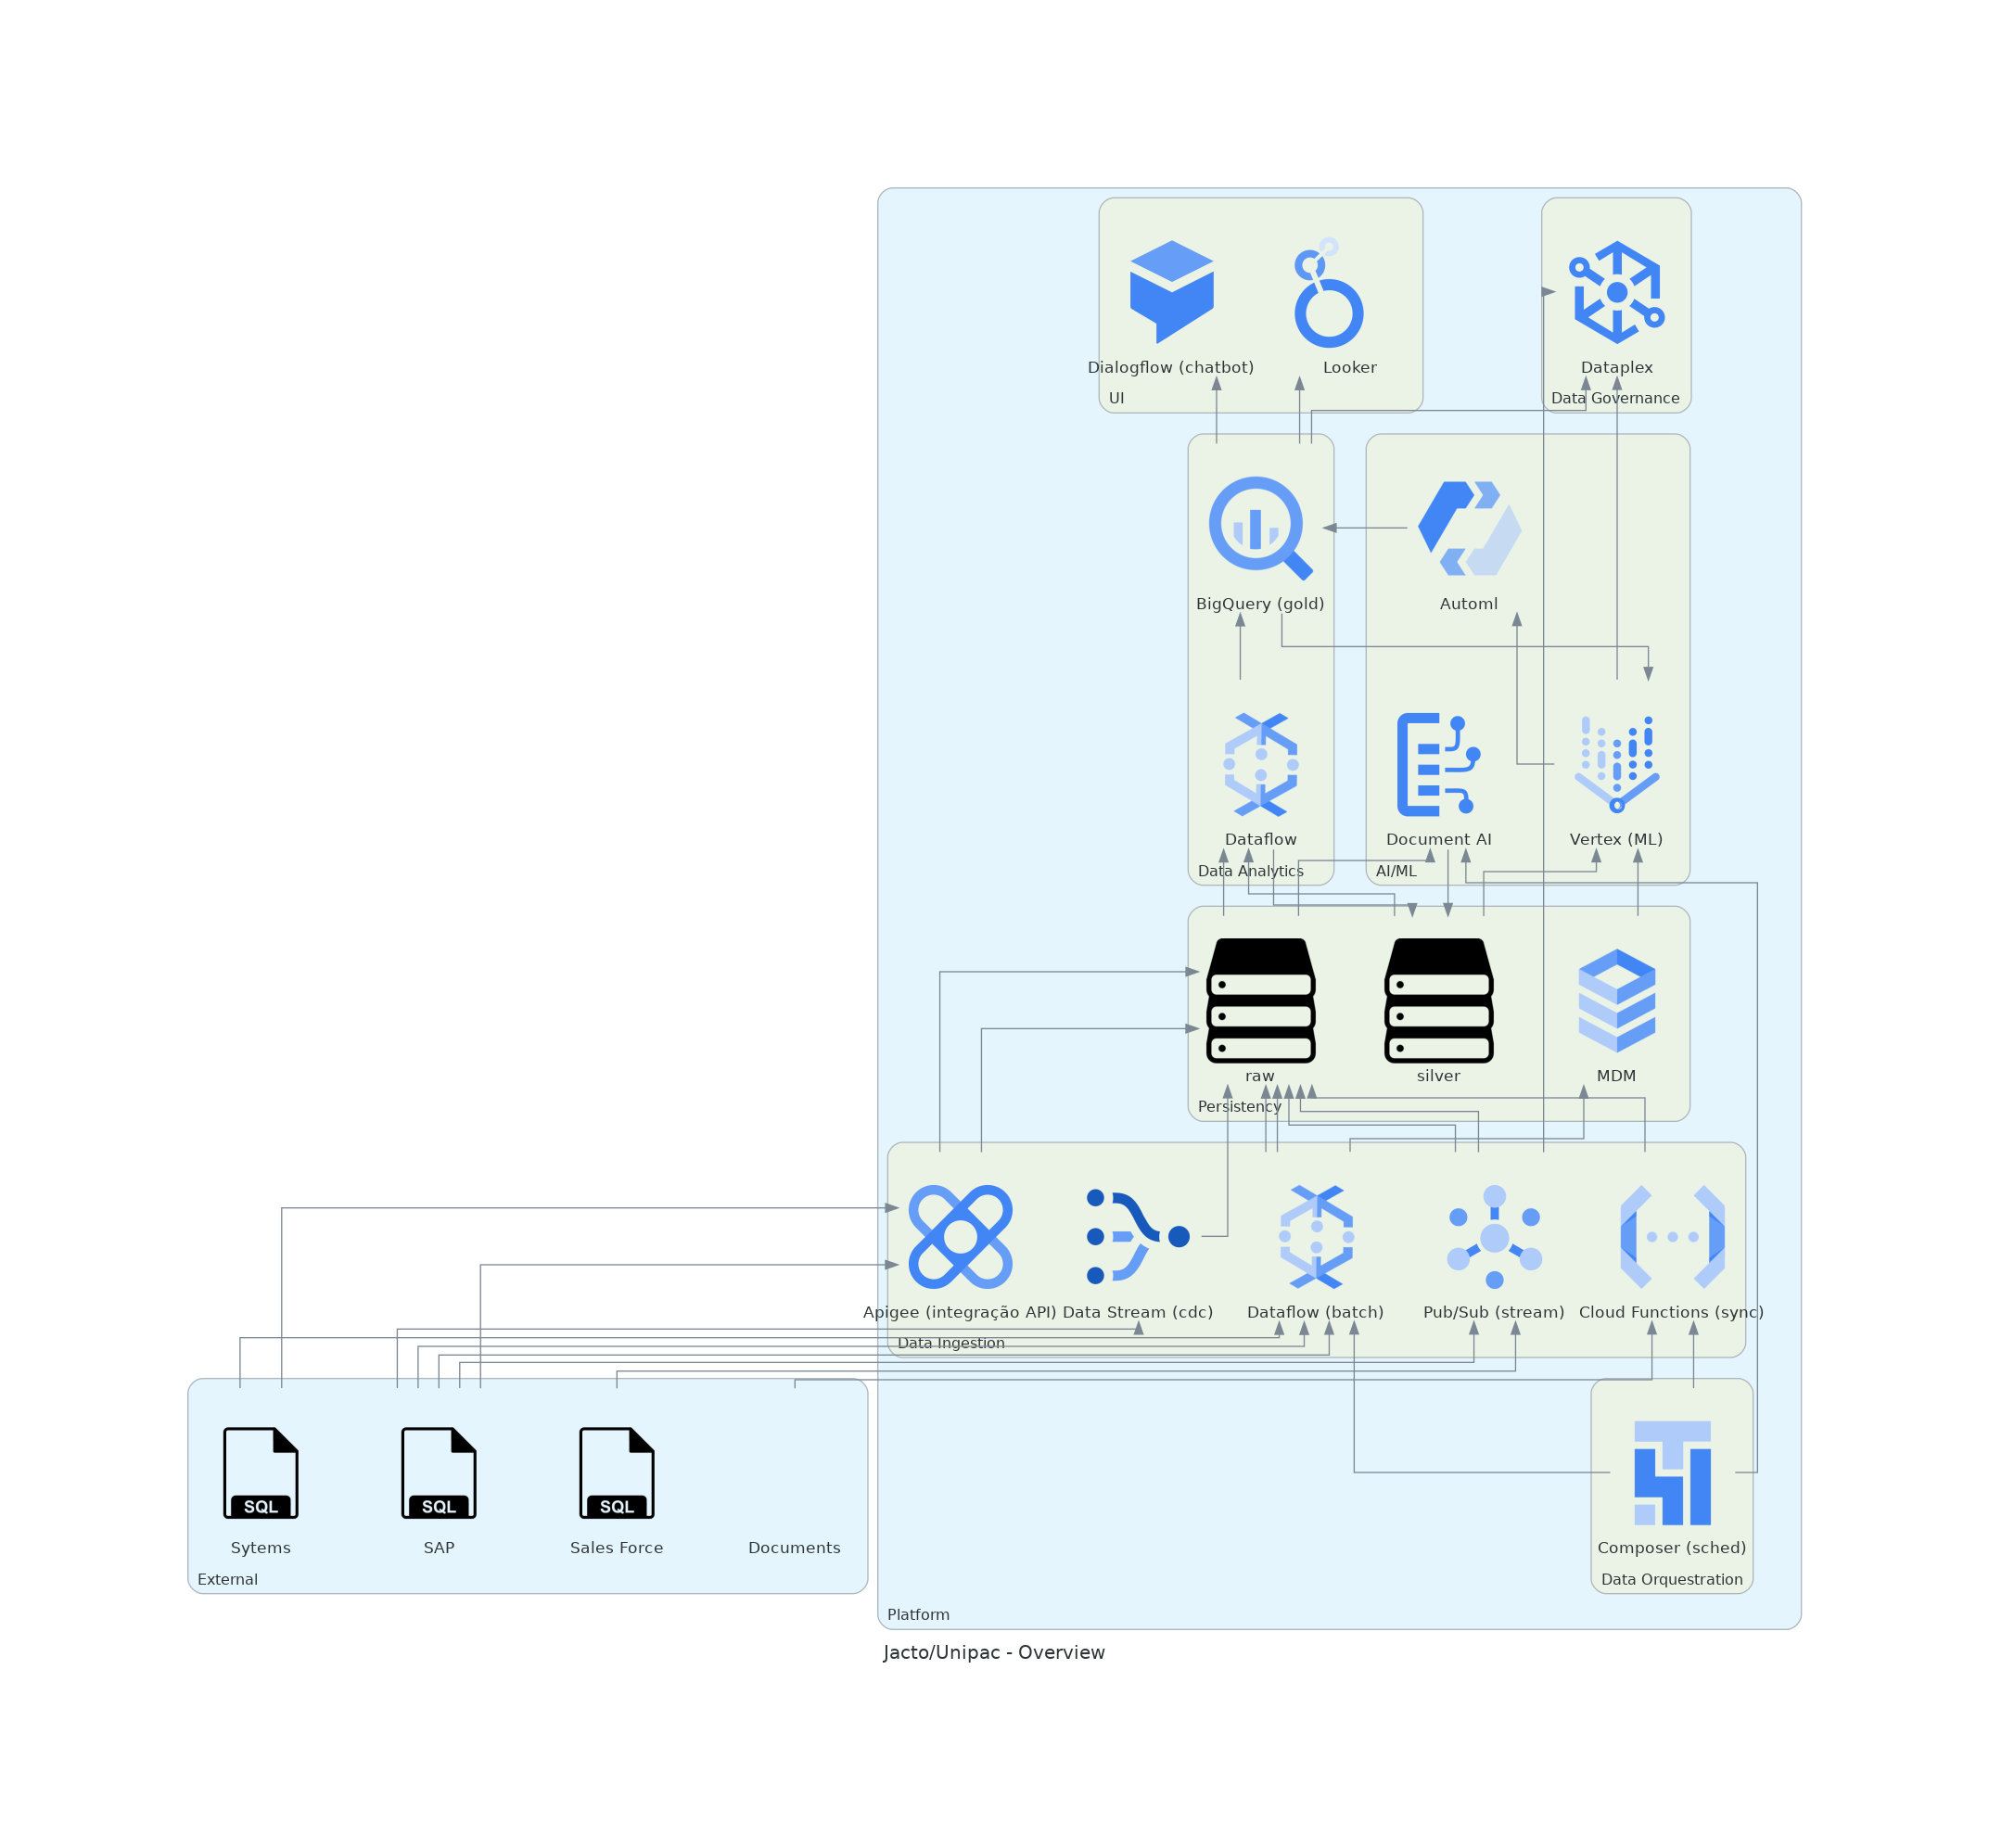

In [11]:
title = "Jacto/Unipac - Overview"
filename = "diagrams/jacto-unipac-overview"

# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="BT",
             show=False) as diag:
    
    with Cluster("External"):           
        external_sap = SQL("SAP")
        external_salesforce = SQL("Sales Force")        
        external_system = SQL("Sytems")           
        documents = Blank("Documents")
    
    with Cluster("Platform"):    
        
      # Cluster para agrupar os componentes relacionados ao processamento de dados
        with Cluster("AI/ML"):            
            document_ai = Custom("Document AI", "../assets/google-cloud-icons/document_ai/document_ai.png")

        with Cluster("Data Ingestion"):            
            
            # Orquestração com Pub/Sub
            stream = Custom("Pub/Sub (stream)", "../assets/google-cloud-icons/pubsub/pubsub.png")
            
            cdc = Custom("Data Stream (cdc)", "../assets/google-cloud-icons/datastream/datastream.png")
            
            batch = Dataflow("Dataflow (batch)")
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions (sync)") 

            # Integração de sistemas com Apigee
            api_integration = Custom("Apigee (integração API)", "../assets/google-cloud-icons/apigee_api_platform/apigee_api_platform.png")
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery (gold)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer (sched)")  
                        

        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker", "../assets/google-cloud-icons/looker/looker.png")  
            dialogflow = Custom("Dialogflow (chatbot)", "../assets/google-cloud-icons/dialogflow/dialogflow.png")  

        with Cluster("Persistency"): 
            
            raw = Storage("raw")   
            silver = Storage("silver") 
            mdm = gcp_sql("MDM")
            

        with Cluster("AI/ML"):
            
            vertex = Custom("Vertex (ML)", "../assets/google-cloud-icons/vertexai/vertexai.png")              
            automl = Automl("Automl")    

        with Cluster("Data Governance"):
            datacatalog = Custom("Dataplex", "../assets/google-cloud-icons/dataplex/dataplex.png")  


    composer >> [sync, batch, document_ai]

    ## data ingestion
    documents >> sync >> raw

    external_sap >> stream >> raw
    external_sap >> cdc >> raw
    external_sap >> batch >> raw
    external_sap >> api_integration >> raw

    external_sap >> batch >> mdm
    
    external_system >> batch >> raw
    external_system >> api_integration >> raw

    external_salesforce >> stream >> raw

    ## data transformation
    raw >> [document_ai, dataflow] >> silver
    silver >> dataflow >> gold

    # machine learning
    [silver, gold, mdm] >> vertex >> automl >> gold
    
    ## ui
    gold >> dialogflow
    gold >> looker

    [vertex, gold, stream] >> datacatalog

diag


## Compras

### Proposta 4 - Automação e Padronização de Relacionamento com Fornecedores

- https://lookerstudio.google.com/u/0/reporting/2fbd4f65-175c-4499-b439-670d8df1ee62/page/p_t7ko9hf6kd?s=lkZ9R3OE6TA

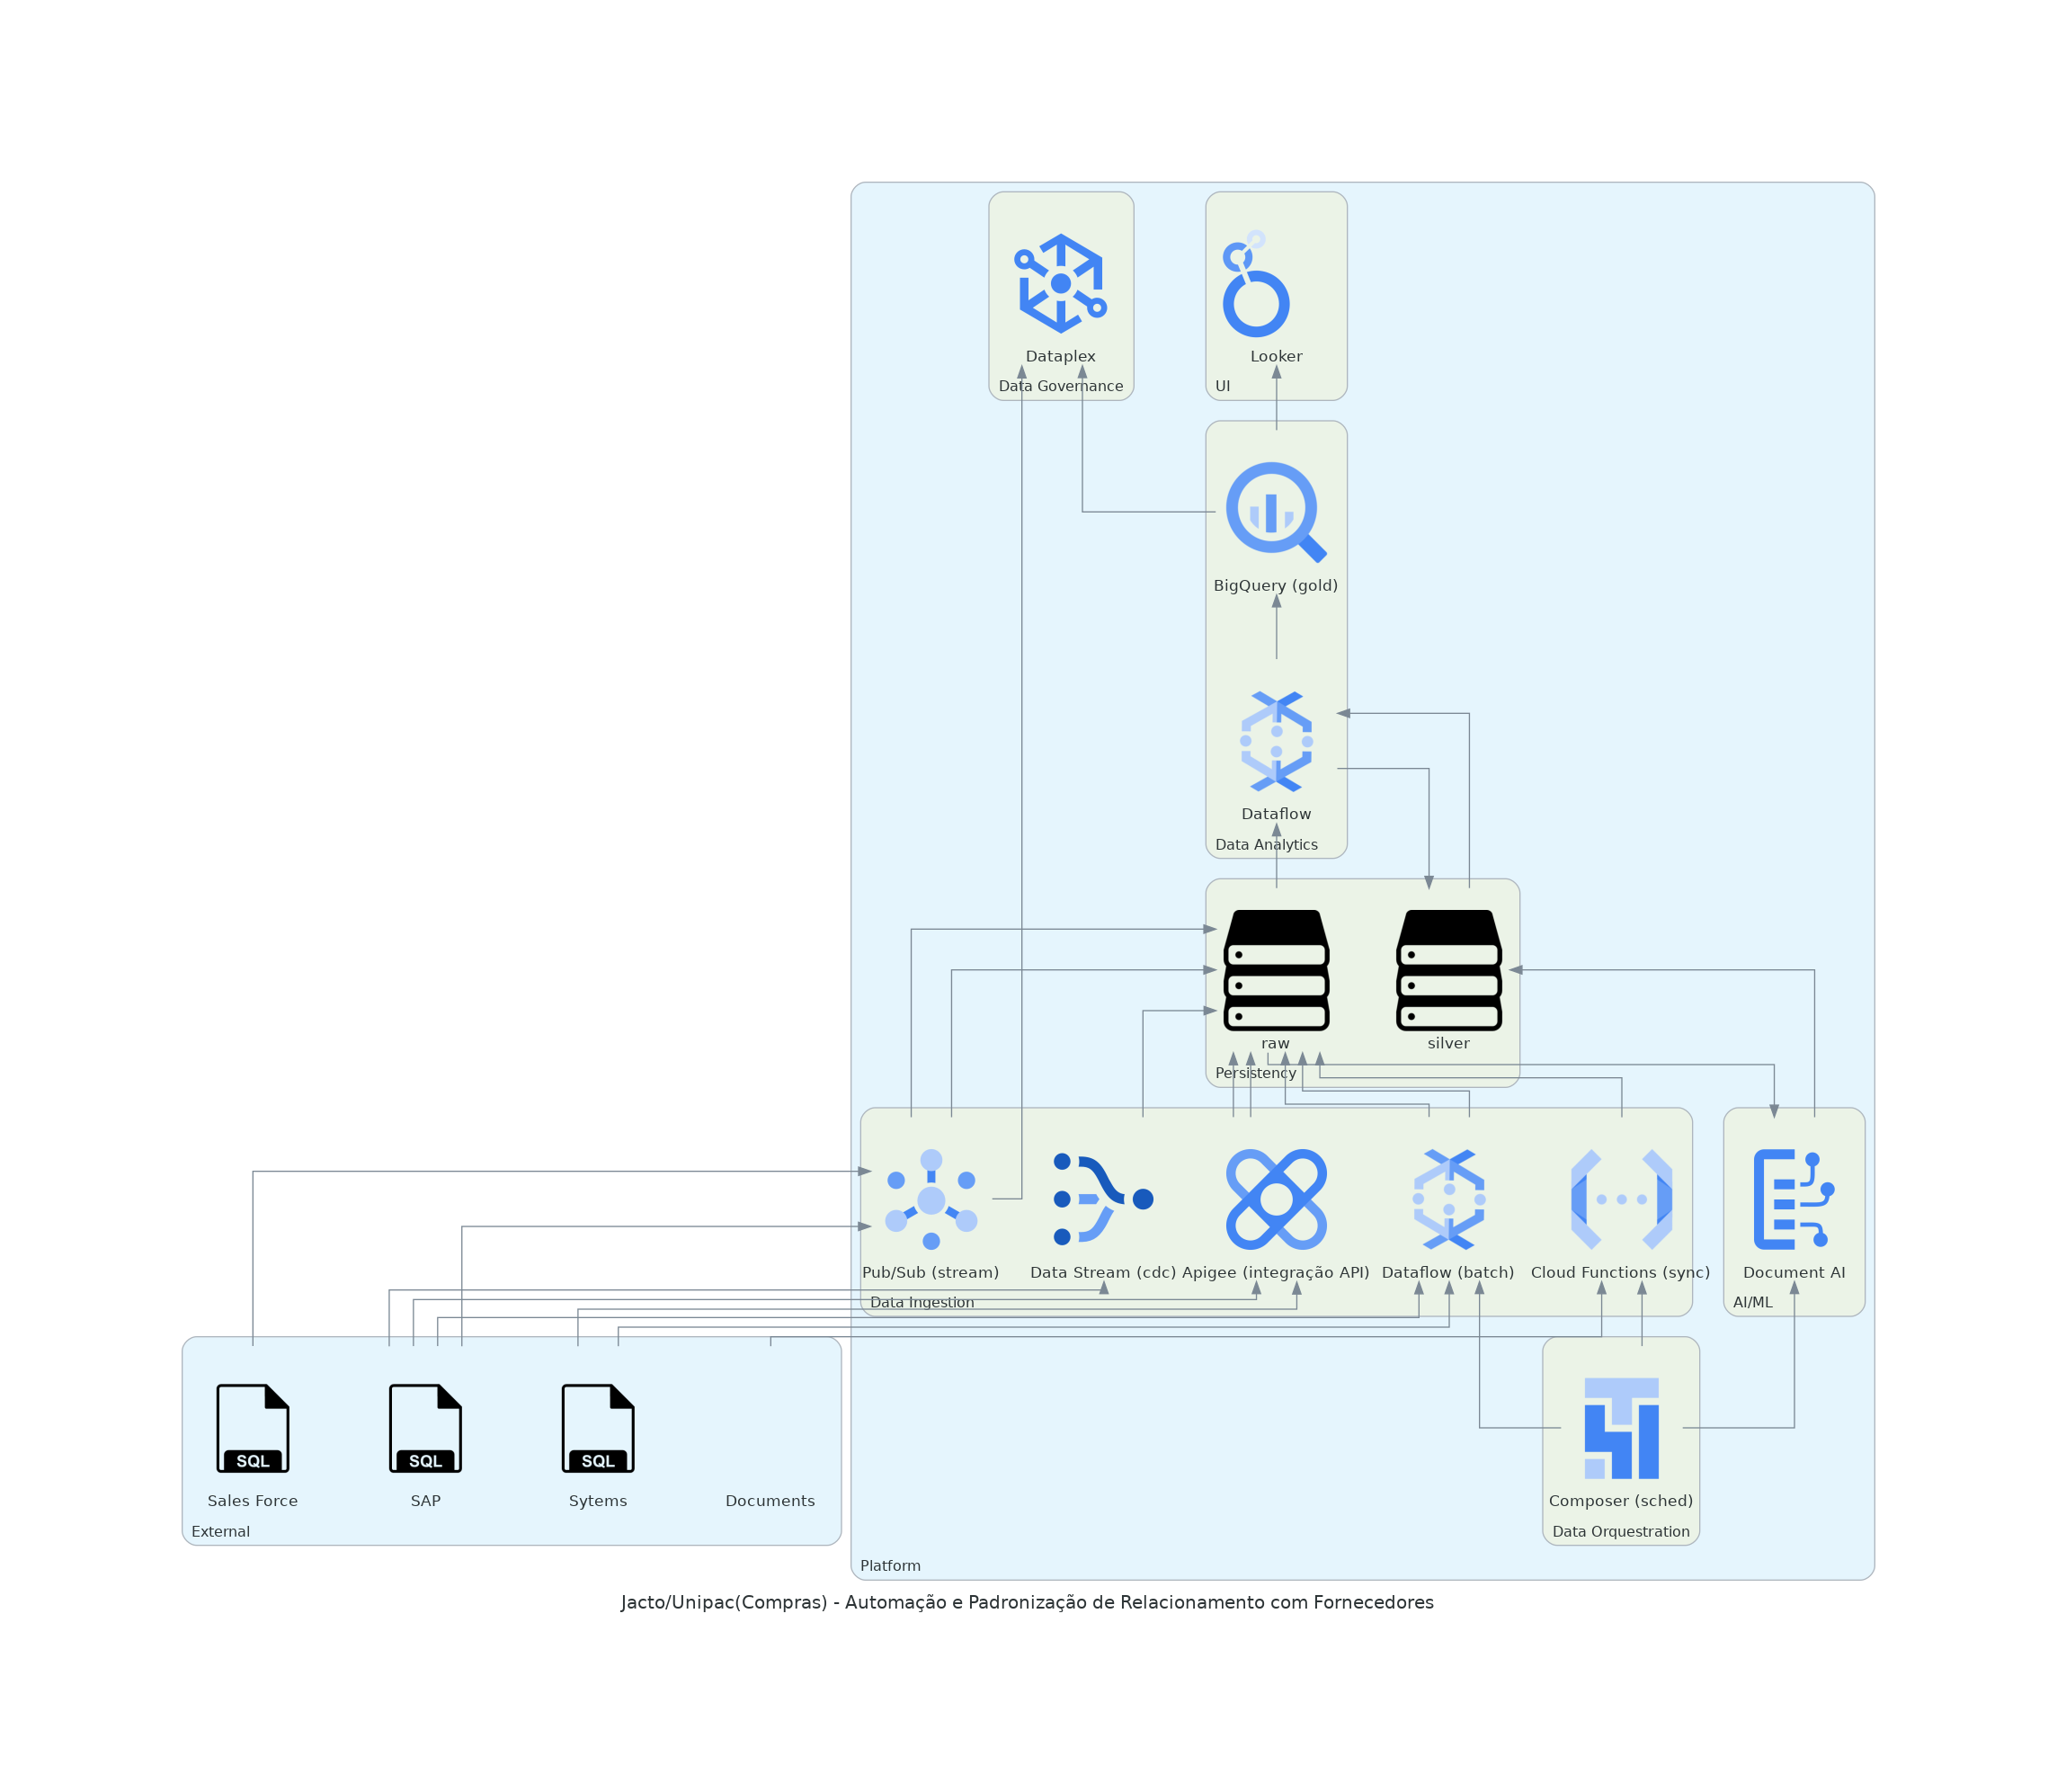

In [17]:
title = "Jacto/Unipac(Compras) - Automação e Padronização de Relacionamento com Fornecedores"
filename = "diagrams/jacto-unipac-compras-proposta4"

# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="BT",
             show=False) as diag:
    
    with Cluster("External"):           
        external_sap = SQL("SAP")
        external_salesforce = SQL("Sales Force")        
        external_system = SQL("Sytems")           
        documents = Blank("Documents")
    
    with Cluster("Platform"):    
        
      # Cluster para agrupar os componentes relacionados ao processamento de dados
        with Cluster("AI/ML"):            
            document_ai = Custom("Document AI", "../assets/google-cloud-icons/document_ai/document_ai.png")

        with Cluster("Data Ingestion"):            
            
            # Orquestração com Pub/Sub
            stream = Custom("Pub/Sub (stream)", "../assets/google-cloud-icons/pubsub/pubsub.png")
            
            cdc = Custom("Data Stream (cdc)", "../assets/google-cloud-icons/datastream/datastream.png")
            
            batch = Dataflow("Dataflow (batch)")
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions (sync)") 

            # Integração de sistemas com Apigee
            api_integration = Custom("Apigee (integração API)", "../assets/google-cloud-icons/apigee_api_platform/apigee_api_platform.png")
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery (gold)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer (sched)")  
                        

        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker", "../assets/google-cloud-icons/looker/looker.png")  

        with Cluster("Persistency"): 
            
            raw = Storage("raw")   
            silver = Storage("silver") 
                   

        with Cluster("Data Governance"):
            
            datacatalog = Custom("Dataplex", "../assets/google-cloud-icons/dataplex/dataplex.png")  


    composer >> [sync, batch, document_ai]

    ## data ingestion
    documents >> sync >> raw

    external_sap >> stream >> raw
    external_sap >> cdc >> raw
    external_sap >> batch >> raw
    external_sap >> api_integration >> raw

    
    external_system >> batch >> raw
    external_system >> api_integration >> raw

    external_salesforce >> stream >> raw

    ## data transformation
    raw >> [document_ai, dataflow] >> silver
    silver >> dataflow >> gold

    ## ui
    gold >> looker

    [vertex, gold, stream] >> datacatalog

diag



### Proposta 3 - Inovação e Prototipagem Inteligente

- https://lookerstudio.google.com/u/0/reporting/2fbd4f65-175c-4499-b439-670d8df1ee62/page/p_t7ko9hf6kd?s=lkZ9R3OE6TA

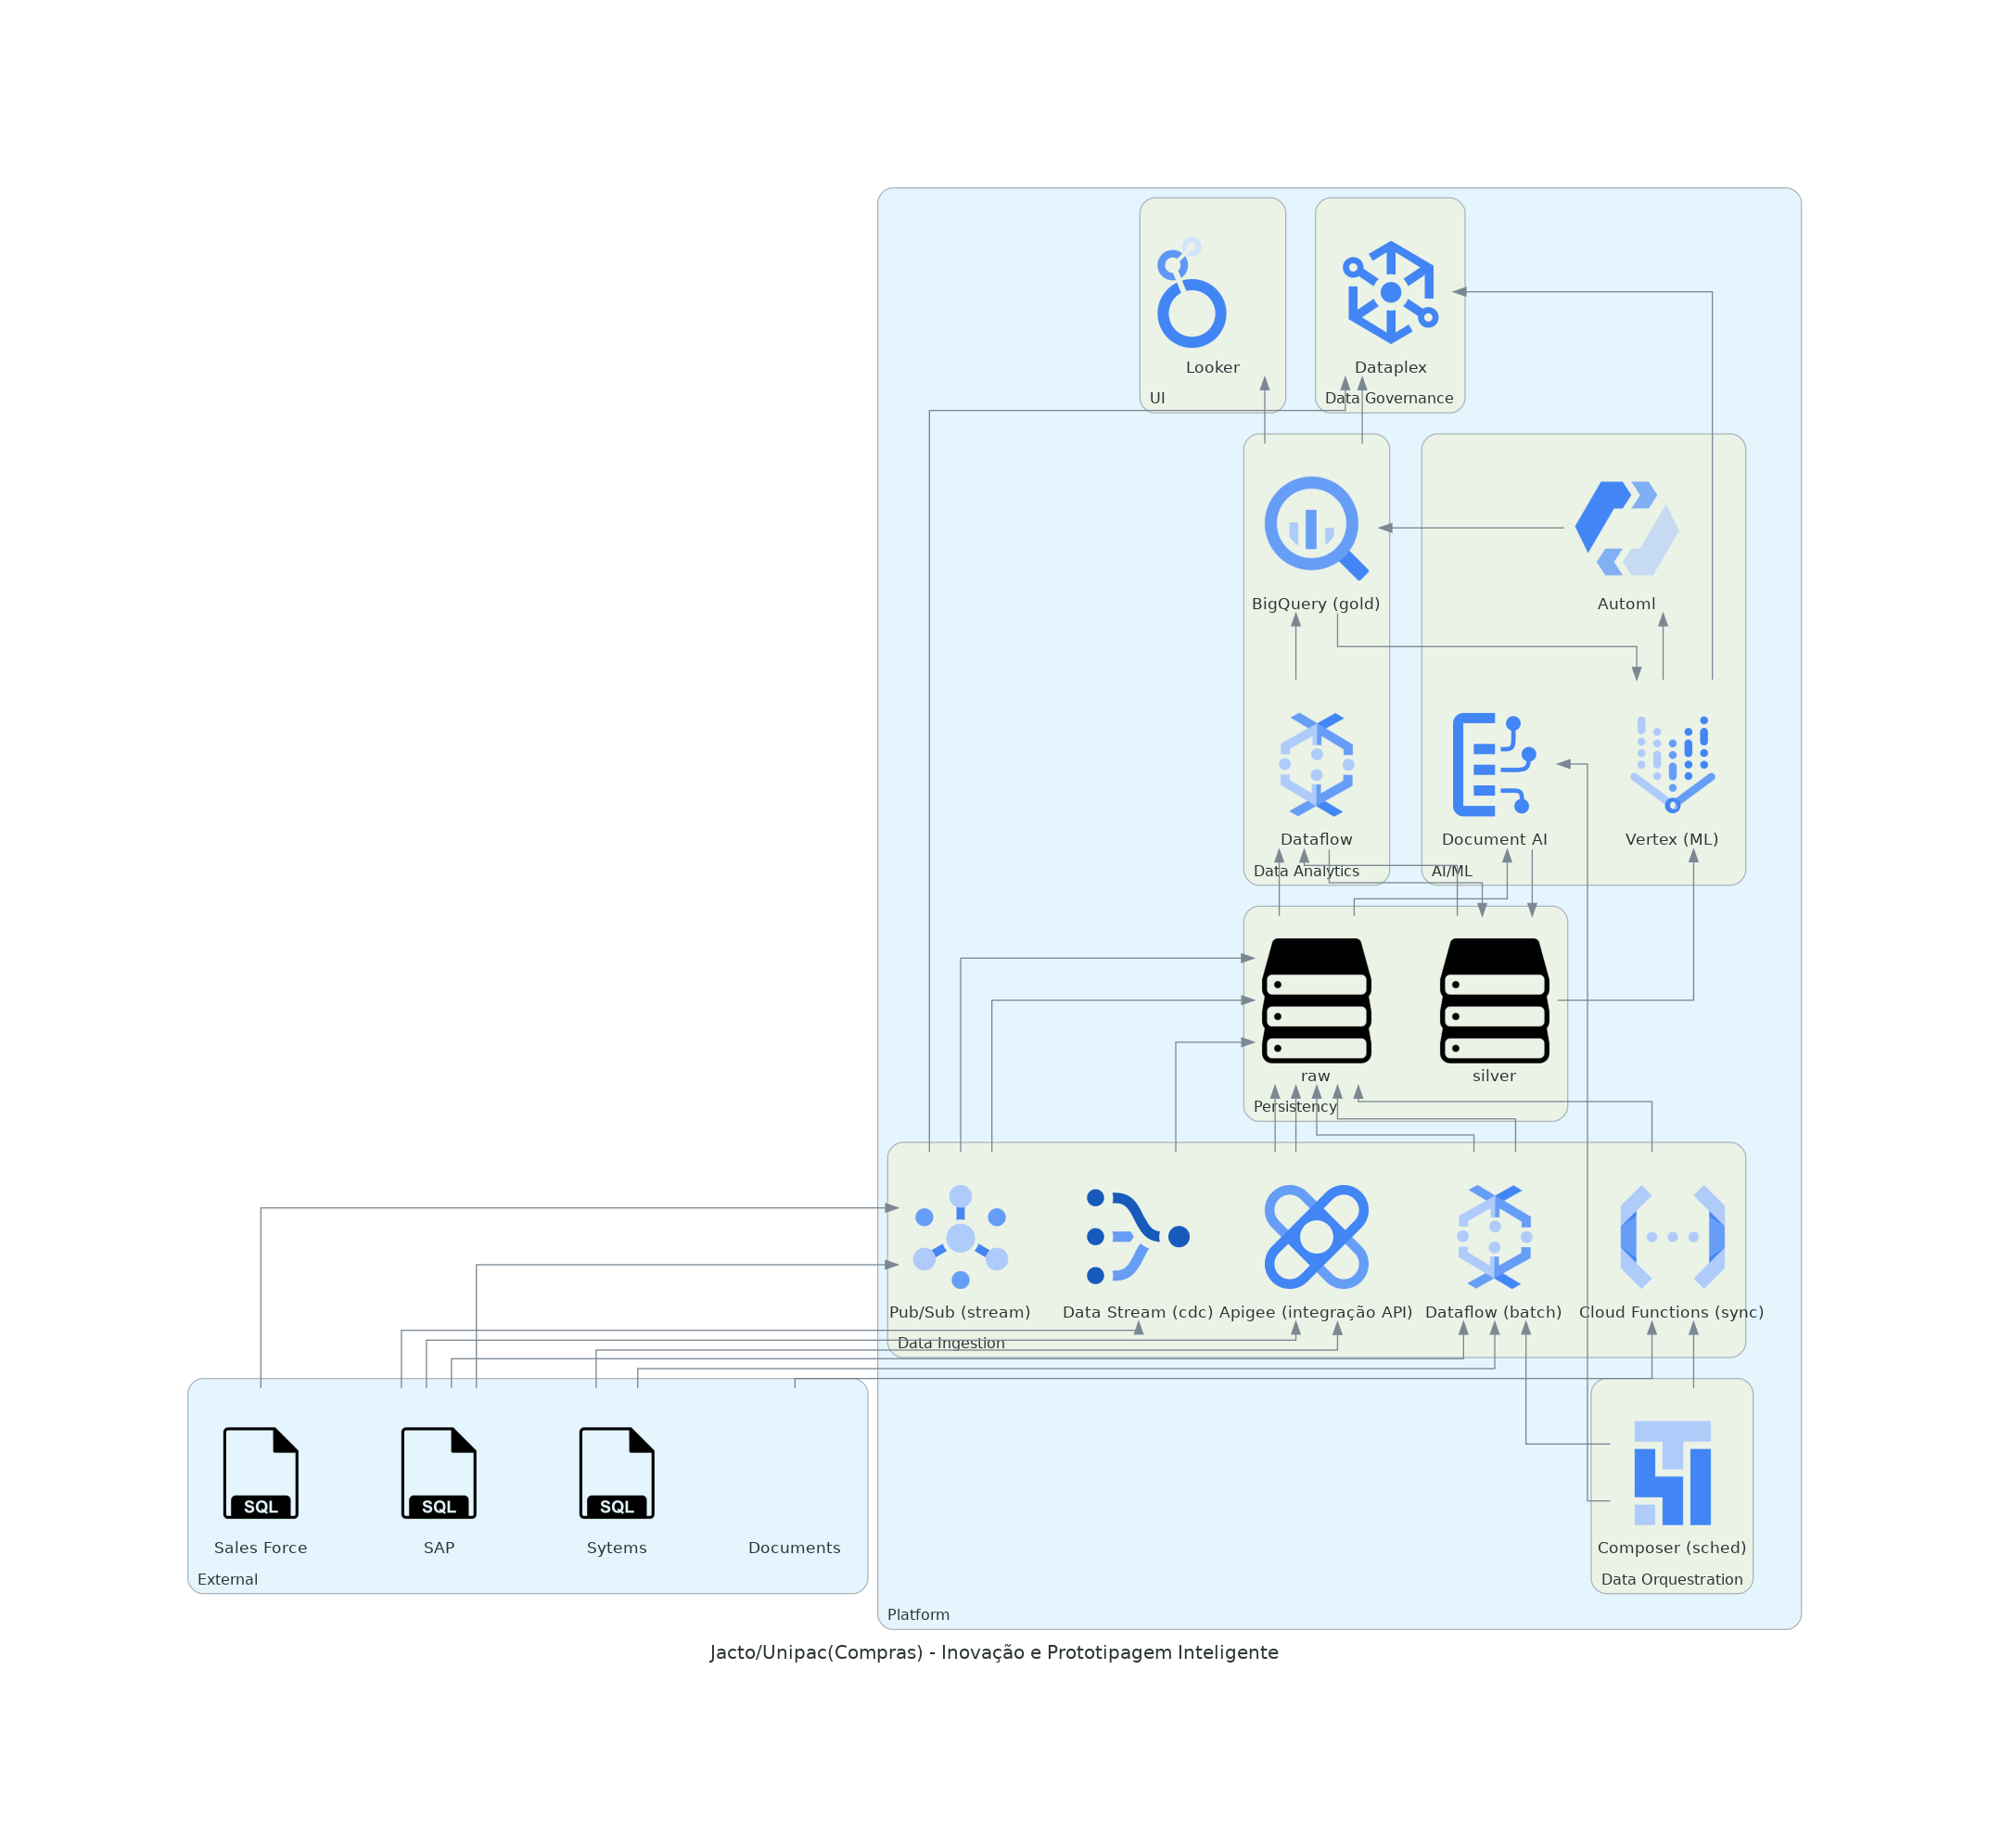

In [19]:
title = "Jacto/Unipac(Compras) - Inovação e Prototipagem Inteligente"
filename = "diagrams/jacto-unipac-compras-proposta3"

# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="BT",
             show=False) as diag:
    
    with Cluster("External"):           
        external_sap = SQL("SAP")
        external_salesforce = SQL("Sales Force")        
        external_system = SQL("Sytems")           
        documents = Blank("Documents")
    
    with Cluster("Platform"):    
        
      # Cluster para agrupar os componentes relacionados ao processamento de dados
        with Cluster("AI/ML"):            
            document_ai = Custom("Document AI", "../assets/google-cloud-icons/document_ai/document_ai.png")

        with Cluster("Data Ingestion"):            
            
            # Orquestração com Pub/Sub
            stream = Custom("Pub/Sub (stream)", "../assets/google-cloud-icons/pubsub/pubsub.png")
            
            cdc = Custom("Data Stream (cdc)", "../assets/google-cloud-icons/datastream/datastream.png")
            
            batch = Dataflow("Dataflow (batch)")
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions (sync)") 

            # Integração de sistemas com Apigee
            api_integration = Custom("Apigee (integração API)", "../assets/google-cloud-icons/apigee_api_platform/apigee_api_platform.png")
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery (gold)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer (sched)")  
                        
        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker", "../assets/google-cloud-icons/looker/looker.png")  

        with Cluster("Persistency"): 
            
            raw = Storage("raw")   
            silver = Storage("silver")            

        with Cluster("AI/ML"):
            
            vertex = Custom("Vertex (ML)", "../assets/google-cloud-icons/vertexai/vertexai.png")              
            automl = Automl("Automl")    

        with Cluster("Data Governance"):
            datacatalog = Custom("Dataplex", "../assets/google-cloud-icons/dataplex/dataplex.png")  


    composer >> [sync, batch, document_ai]

    ## data ingestion
    documents >> sync >> raw

    external_sap >> stream >> raw
    external_sap >> cdc >> raw
    external_sap >> batch >> raw
    external_sap >> api_integration >> raw

    
    external_system >> batch >> raw
    external_system >> api_integration >> raw

    external_salesforce >> stream >> raw

    ## data transformation
    raw >> [document_ai, dataflow] >> silver
    silver >> dataflow >> gold

    # machine learning
    [silver, gold] >> vertex >> automl >> gold
    
    ## ui
    gold >> looker

    [vertex, gold, stream] >> datacatalog

diag



### Proposta 2 - Gestão Preventiva e Automação de Materiais Indiretos

- https://lookerstudio.google.com/u/0/reporting/2fbd4f65-175c-4499-b439-670d8df1ee62/page/p_t7ko9hf6kd?s=lkZ9R3OE6TA

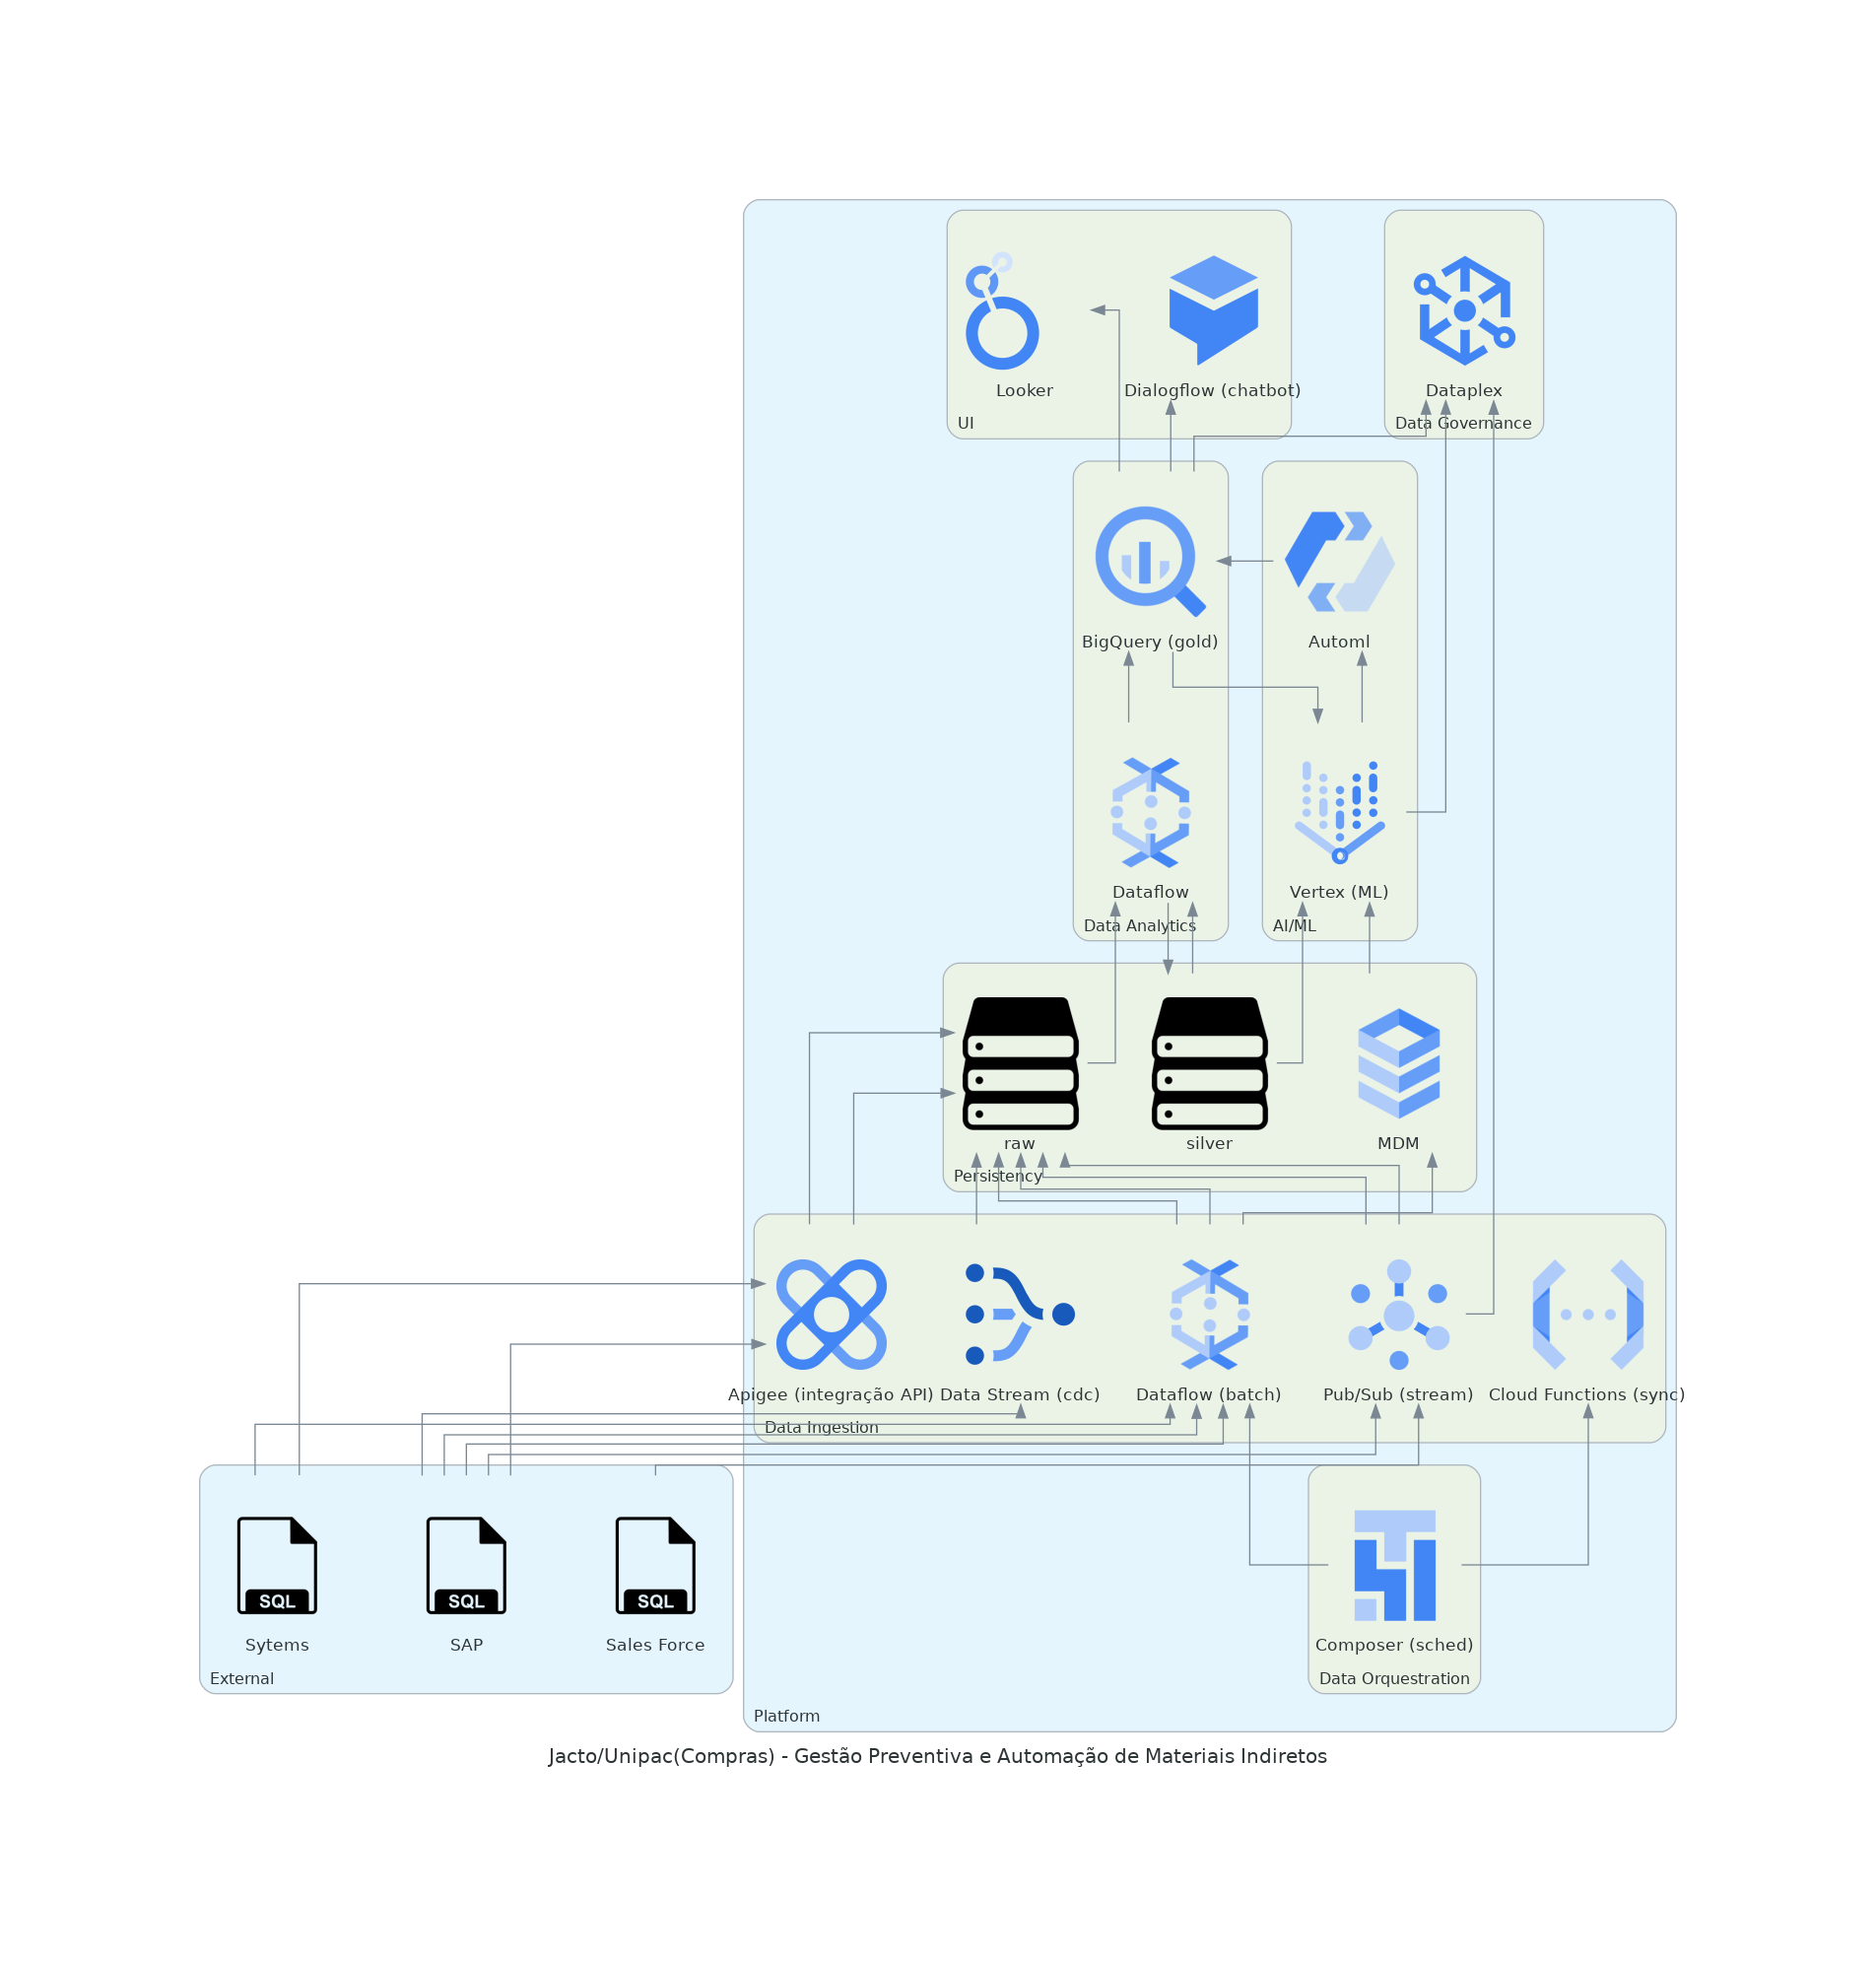

In [22]:
title = "Jacto/Unipac(Compras) - Gestão Preventiva e Automação de Materiais Indiretos"
filename = "diagrams/jacto-unipac-compras-proposta2"

# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="BT",
             show=False) as diag:
    
    with Cluster("External"):           
        external_sap = SQL("SAP")
        external_salesforce = SQL("Sales Force")        
        external_system = SQL("Sytems")           
    
    with Cluster("Platform"):    
        
        with Cluster("Data Ingestion"):            
            
            # Orquestração com Pub/Sub
            stream = Custom("Pub/Sub (stream)", "../assets/google-cloud-icons/pubsub/pubsub.png")
            
            cdc = Custom("Data Stream (cdc)", "../assets/google-cloud-icons/datastream/datastream.png")
            
            batch = Dataflow("Dataflow (batch)")
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions (sync)") 

            # Integração de sistemas com Apigee
            api_integration = Custom("Apigee (integração API)", "../assets/google-cloud-icons/apigee_api_platform/apigee_api_platform.png")
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery (gold)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer (sched)")                          

        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker", "../assets/google-cloud-icons/looker/looker.png")  
            dialogflow = Custom("Dialogflow (chatbot)", "../assets/google-cloud-icons/dialogflow/dialogflow.png")  

        with Cluster("Persistency"): 
            
            raw = Storage("raw")   
            silver = Storage("silver") 
            mdm = gcp_sql("MDM")
            
        with Cluster("AI/ML"):
            
            vertex = Custom("Vertex (ML)", "../assets/google-cloud-icons/vertexai/vertexai.png")              
            automl = Automl("Automl")    

        with Cluster("Data Governance"):
            datacatalog = Custom("Dataplex", "../assets/google-cloud-icons/dataplex/dataplex.png")  


    composer >> [sync, batch]

    ## data ingestion

    external_sap >> stream >> raw
    external_sap >> cdc >> raw
    external_sap >> batch >> raw
    external_sap >> api_integration >> raw

    external_sap >> batch >> mdm
    
    external_system >> batch >> raw
    external_system >> api_integration >> raw

    external_salesforce >> stream >> raw

    ## data transformation
    raw >> [dataflow] >> silver
    silver >> dataflow >> gold

    # machine learning
    [silver, gold, mdm] >> vertex >> automl >> gold
    
    ## ui
    gold >> dialogflow
    gold >> looker

    [vertex, gold, stream] >> datacatalog

diag


### Proposta 1 - Plataforma de Inteligência de Preços e Cotação

- https://lookerstudio.google.com/u/0/reporting/2fbd4f65-175c-4499-b439-670d8df1ee62/page/p_t7ko9hf6kd?s=lkZ9R3OE6TA

A solução será construída utilizando BigQuery para armazenamento e análise de dados históricos e de mercado. AI Platform desenvolverá modelos preditivos para price forecasting e análise de custos em tempo real. Dataflow será utilizado para processamento e integração de dados provenientes de diferentes fontes, incluindo SAP e Salesforce. Apigee fornecerá a integração entre sistemas, enquanto Cloud Functions e Cloud Composer automatizarão processos como cotações e atualizações de preços. Looker e Data Studio fornecerão dashboards interativos para monitoramento de preços, análise de mercado e simulação de cenários.

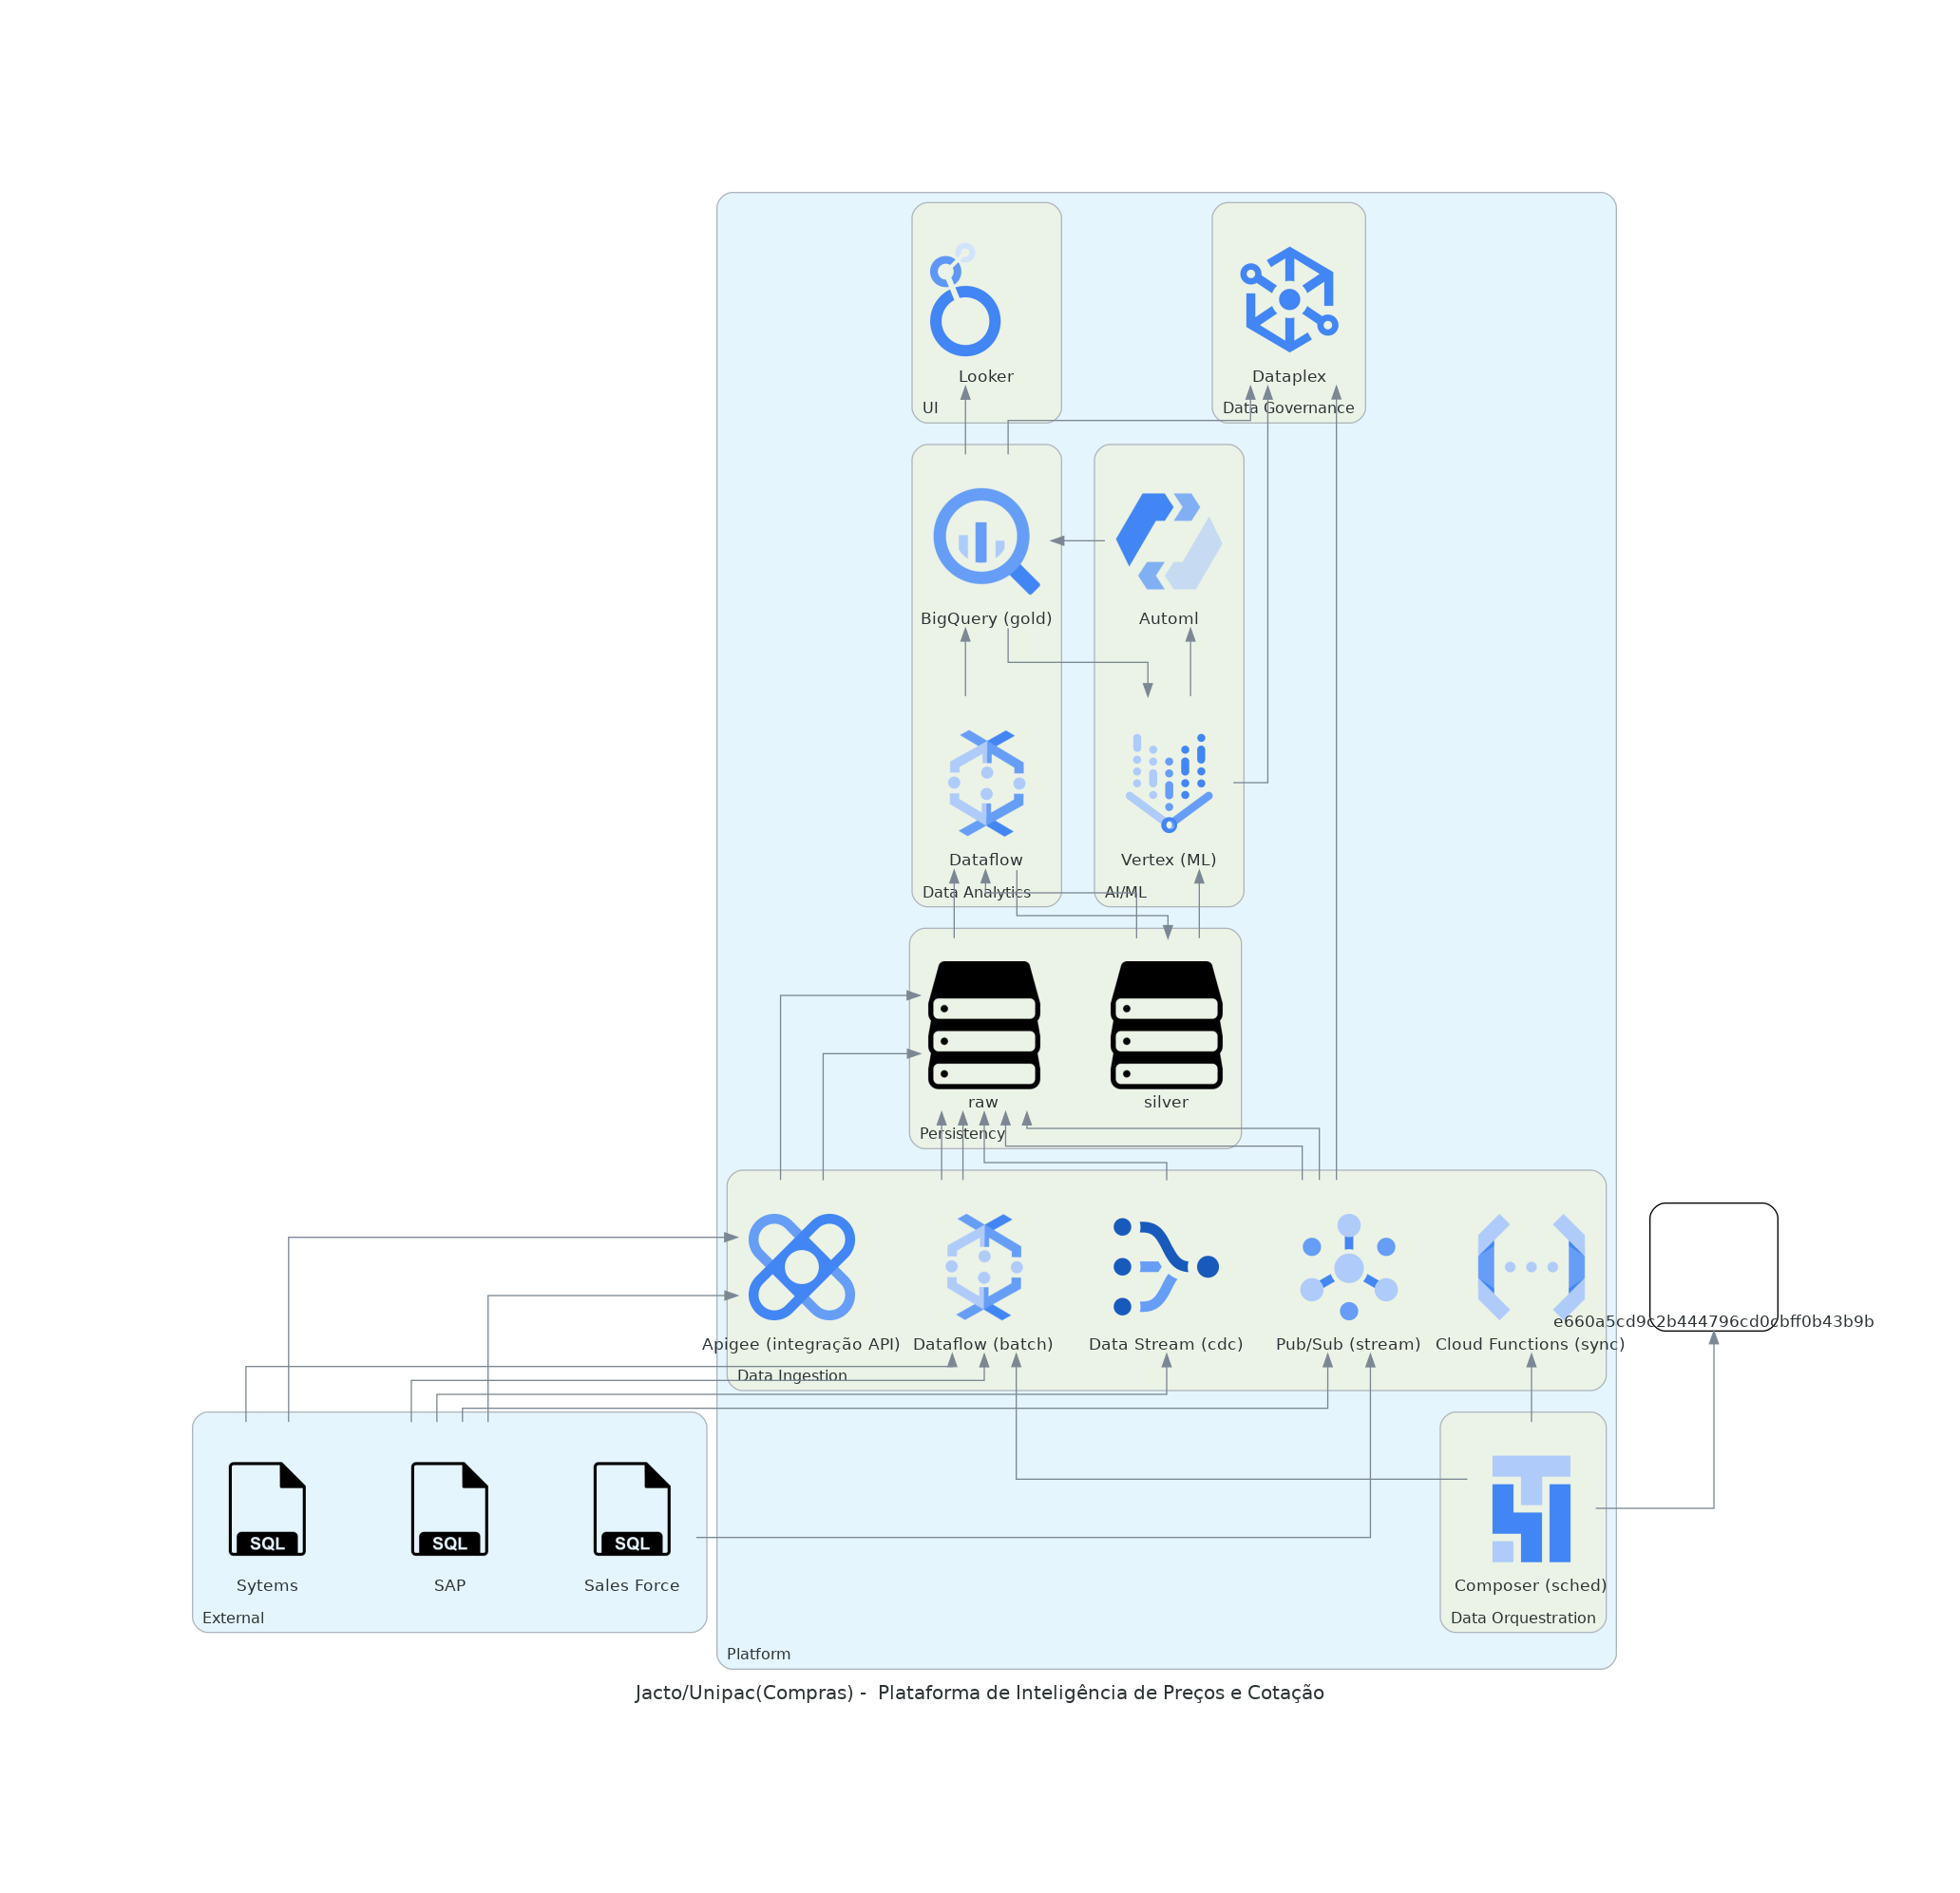

In [24]:
title = "Jacto/Unipac(Compras) -  Plataforma de Inteligência de Preços e Cotação"
filename = "diagrams/jacto-unipac-compras-proposta1"

# Criando o diagrama
with Diagram(title, 
             outformat=["png"],
             filename=filename,
             direction="BT",
             show=False) as diag:
    
    with Cluster("External"):           
        external_sap = SQL("SAP")
        external_salesforce = SQL("Sales Force")        
        external_system = SQL("Sytems")           
    
    with Cluster("Platform"):    
        
        with Cluster("Data Ingestion"):            
            
            # Orquestração com Pub/Sub
            stream = Custom("Pub/Sub (stream)", "../assets/google-cloud-icons/pubsub/pubsub.png")
            
            cdc = Custom("Data Stream (cdc)", "../assets/google-cloud-icons/datastream/datastream.png")
            
            batch = Dataflow("Dataflow (batch)")
            
            # Automação com Cloud Functions
            sync = Functions("Cloud Functions (sync)") 

            # Integração de sistemas com Apigee
            api_integration = Custom("Apigee (integração API)", "../assets/google-cloud-icons/apigee_api_platform/apigee_api_platform.png")
            
        with Cluster("Data Analytics"):
            
            dataflow = Dataflow("Dataflow")
            
            # Repositório central BigQuery
            gold = Bigquery("BigQuery (gold)")

        with Cluster("Data Orquestration"):                    
            # Orquestração de workflows com Cloud Composer
            composer = Composer("Composer (sched)")  
                        

        with Cluster("UI"):    
            
            # Dashboards com Looker
            looker = Custom("Looker", "../assets/google-cloud-icons/looker/looker.png")  

        with Cluster("Persistency"): 
            
            raw = Storage("raw")   
            silver = Storage("silver") 
            

        with Cluster("AI/ML"):
            
            vertex = Custom("Vertex (ML)", "../assets/google-cloud-icons/vertexai/vertexai.png")              
            automl = Automl("Automl")    

        with Cluster("Data Governance"):
            datacatalog = Custom("Dataplex", "../assets/google-cloud-icons/dataplex/dataplex.png")  


    composer >> [sync, batch, document_ai]

    ## data ingestion

    external_sap >> stream >> raw
    external_sap >> cdc >> raw
    external_sap >> batch >> raw
    external_sap >> api_integration >> raw

    
    external_system >> batch >> raw
    external_system >> api_integration >> raw

    external_salesforce >> stream >> raw

    ## data transformation
    raw >> [dataflow] >> silver
    silver >> dataflow >> gold

    # machine learning
    [silver, gold] >> vertex >> automl >> gold
    
    ## ui
    gold >> looker

    [vertex, gold, stream] >> datacatalog

diag
